**Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.**

**Часть 1. Приоритизация гипотез.**

В файле - `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача:**

1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Описание данных:**

- Файл - `/datasets/hypothesis.csv.`
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Часть 2. Анализ A/B-теста**

Вы провели A/B-тест и получили результаты, которые описаны в файлах - `/datasets/orders.csv` и - `/datasets/visitors.csv.`

**Задача:**

Проанализируйте A/B-тест:

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.`
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.`
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.`
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.`
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.`
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.`
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.`
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.`
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.`
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.`
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.`
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.`
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.`


**Примите решение по результатам теста и объясните его. Варианты решений:**

1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Описание данных:**

- Файл - `/datasets/orders.csv.` 

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.


- Файл - `/datasets/visitors.csv.` 


- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста


# Часть 1. Приоритизация гипотез.

In [1]:
import pandas as pd                    #импорт библиотек
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
df = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
pd.options.display.max_colwidth = 100

In [4]:
df.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Описание данных

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [5]:
df['ICE'] = ((df['Impact'] * df['Confidence']) / df['Efforts']).round(2) # ICE
display(df.sort_values('ICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


In [6]:
df['RICE'] = df['Reach'] * df['Impact'] * df['Confidence'] / df['Efforts'] # RICE
display(df.sort_values('RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


По фреймворку ICE наибольшую оценку имели гпиотезы 8,0 и 7. После применения фреймворка RICE приоритеты изменились на гпиотезы 7,2 и 0. Это объясняется тем, что в случае фреймворка ICE, в отличие от RICE, мы не учитывали охват изменений, тогда как это важная составляющая оценки гипотез. 

В нашем случае наиболее приоритетными гипотезами будут 7, 2, 0.

# Часть 2. Анализ A/B-теста

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
print("Количество дубликатов в таблице orders =",orders.duplicated().sum())
print("Количество дубликатов в таблице visitors =",visitors.duplicated().sum())

Количество дубликатов в таблице orders = 0
Количество дубликатов в таблице visitors = 0


In [13]:
visitors['date'].max()

'2019-08-31'

In [14]:
visitors['date'].min()

'2019-08-01'

In [15]:
orders['date'].max()

'2019-08-31'

In [16]:
orders['date'].min()

'2019-08-01'

Дата начала теста: 2019-08-01

Дата окончная теста: 2019-08-31 

### 2.1 График кумулятивной выручки по группам

In [17]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y/%m/%d') # изменим object на datetime

In [18]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y/%m/%d')

Чтобы построить графики, нужно собрать кумулятивные данные

In [19]:
datesGroups = orders[['date','group']].drop_duplicates() # создаем массив уникальных пар значений дат и групп теста

In [20]:
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [21]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max', 
'transactionId' : 'nunique', 
'visitorId' : 'nunique', 
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [22]:
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [23]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max', 
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [24]:
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [25]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [26]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [27]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [28]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Построим график выручки по группам:

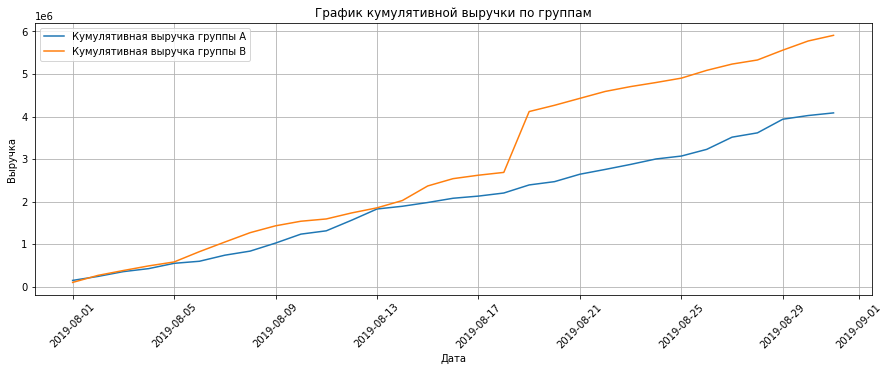

In [29]:
# Строим график выручки группы А
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кумулятивная выручка группы A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кумулятивная выручка группы B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation=45) 
plt.legend()
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. Графики выручки обеих групп в нескольких точках резко растут. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке(более характерно группе B). 

### 2.2 График кумулятивного среднего чека по группам

Разделим кумулятивную выручку на кумулятивное число заказов:

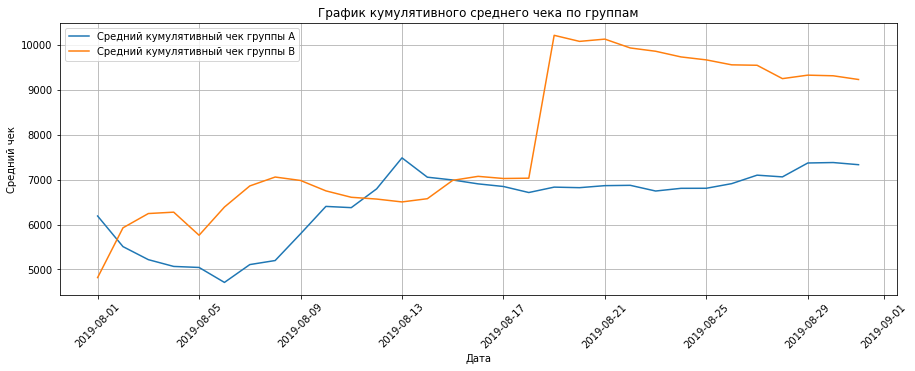

In [30]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Средний кумулятивный чек группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Средний кумулятивный чек группы B')
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.show()

Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике). Принимать решение по этой метрике рано. Или требуется дополнительный анализ выбросов, которые искажают результат

### 2.3 График относительного изменения кумулятивного среднего чека группы B к группе A

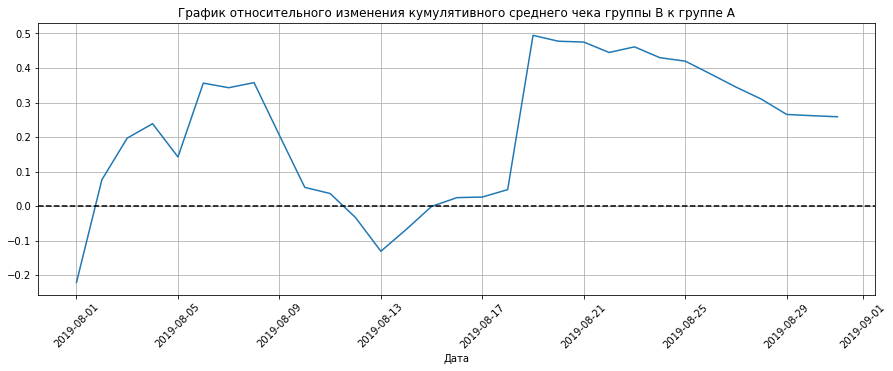

In [31]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',
right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/
mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=45)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Видимо, именно тогда были совершены аномальные заказы

### 2.4 График кумулятивной конверсии по группам

In [32]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [33]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

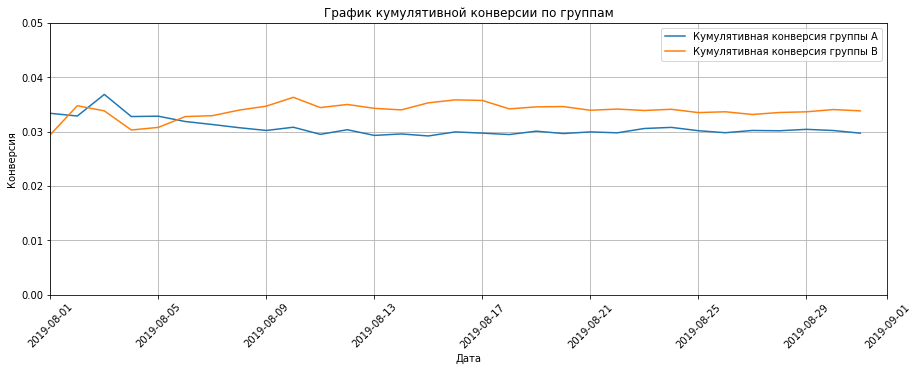

In [34]:
# строим графики
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Кумулятивная конверсия группы A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Кумулятивная конверсия группы B')
plt.xticks(rotation=45)
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.show()

В начале теста группа A имела большую конверсия, но конверсия группы B выровнялась и зафиксировалась примерно около одного значения, больше значения группы A 

### 2.5 График относительного изменения кумулятивной конверсии группы B к группе A

In [35]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],
left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

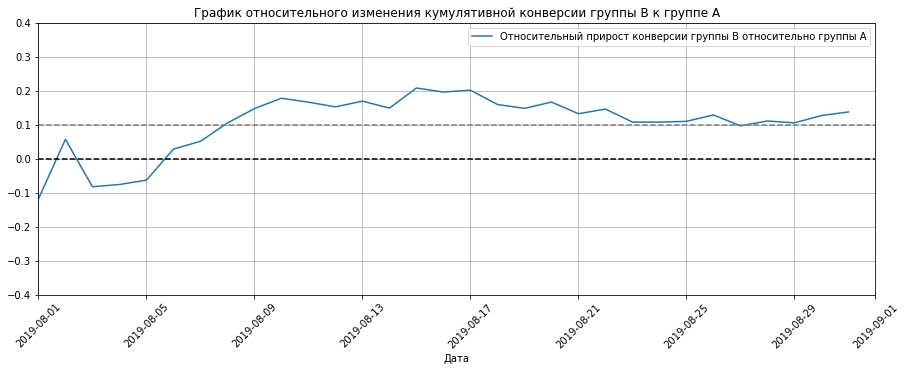

In [36]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/        
mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.4, 0.4])
plt.show()

В начале теста конверсия группа B проигрывала конверсии группе A, затем вырвалась вперёд, зафиксироваваль около прироста в 10 - 14% относительно группы B

### 2.6 Точечный график количества заказов по пользователям

In [37]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})

In [38]:
ordersByUsers.columns = ['visitorId', 'orders']

In [39]:
ordersByUsers

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


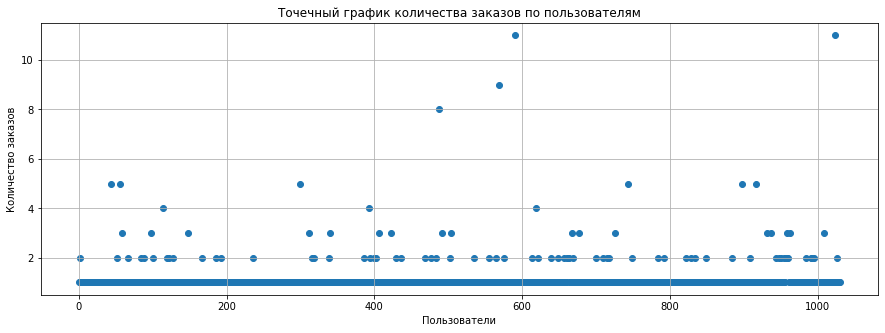

In [40]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

много пользователей с 2-4 заказами

### 2.7 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей

In [41]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

не более 5% пользователей оформляли 2 заказа и не более 1% пользователей - 4 заказа.

Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### 2.8 Точечный график стоимостей заказов

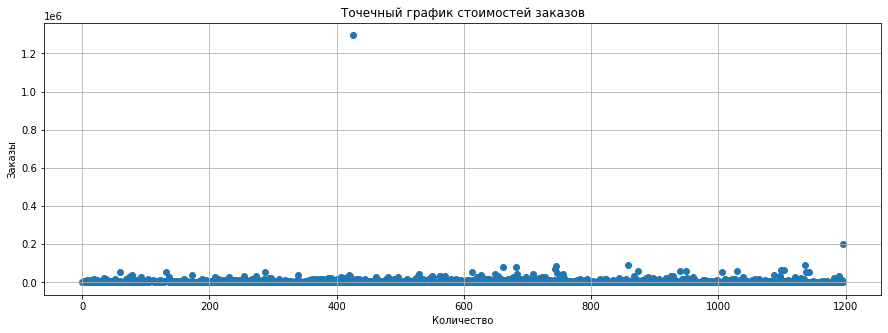

In [42]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество')
plt.ylabel('Заказы')
plt.show()

есть выбросы в районе 200 000 и 1 300 000 рублей

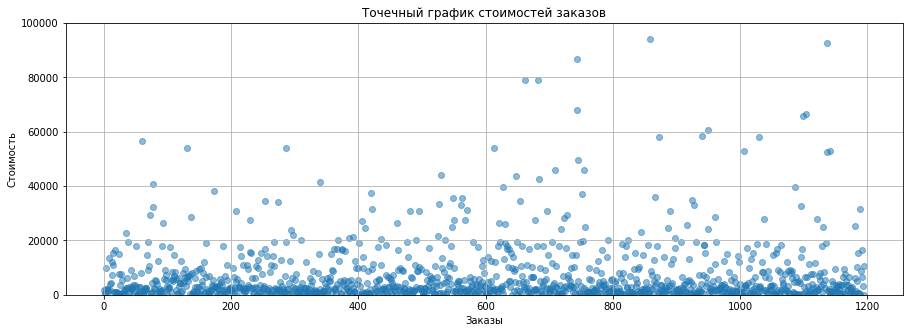

In [43]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость')
plt.ylim(0, 100000)
plt.show()

По графику без установленных выбросов видно, что основаня часть заказов в районе 60000

### 2.9 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.

In [44]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

не более 5% заказов дороже 28 000 рублей и не более 1% заказаов дороже 58 233 рублей. 

99% заказов меньше суммы 58233.2, установим её в качестве границы для аномалий.

### 2.10 Статистическая значимость различий в конверсии между группами по «сырым» данным

Соберем все данные по заказам и визитам (а также кумулятивные показатели) в одну таблицу. Для этого создадим несколько таблиц и затем объединим их

In [45]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1)   
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
    
ordersADaily = ( 
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby(by=['date'],  as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ), axis=1).sort_values(by=['date'])                          
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']                          

Далее объединим всё в одну таблицу по общему столбцу 'date'

In [46]:
data = (
    ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [47]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Названия столбцов данных:

- `date` — дата;
- `ordersPerDateA` — количество заказов в выбранную дату в группе A;
- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
- `ordersPerDateB` — количество заказов в выбранную дату в группе B;
- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
- `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [48]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId' : pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

In [49]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId' : pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [50]:
ordersByUsersA

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов.

In [51]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() -
     len(ordersByUsersA['orders'])), name='orders')],axis=0)
                    
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() -
     len(ordersByUsersB['orders'])), name='orders')],axis=0)                    
                    

Сформулируем гипотезы:
- H0 = "статистически значимых различий в конверсии между группами нет" 
- H1 = "статистически значимые различия в конверсиях между группами есть"

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой. 

Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean(). Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой (пороговое значение возьмём равное 5%).

In [52]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean() / sampleA.mean()-1)) 

alpha = 0.05
p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138


P-value меньше alpha, поэтому нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. По «сырым» данным различия в конверсии групп A и B есть. Относительный проигрыш группы А равен 13.8% 

### 2.11 Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы:
- H0 - "статистически значимых различий в среднем чеке заказа между группами нет"
- H1 - "статистически значимые различия в среднем чеке заказа между группами есть"

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. Также найдём относительные различия в среднем чеке между группами:

In [53]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'],
     orders[orders['group'] == 'B']['revenue'])[1]))    
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean() /
      orders[orders['group'] == 'A']['revenue'].mean() -1))                                                    

alpha = 0.05
p-value = 0.729
Относительный показатель 'B' и 'A' = 0.259


P-value больше alpha, поэтому нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет, не отвергаем. По «сырым» данным различий в среднем чеке заказа групп A и B нет. Однако средний чек группы B выше среднего чека группы A на 25,9 %

### 2.12 Статистическая значимость различий в конверсии между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 58233.2 рублей. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 58233.2 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.
Узнаем, сколько всего аномальных пользователей атрибутом shape.

In [54]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
    ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis=0)

usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']   

In [55]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [56]:
print('Всего', abnormalUsers.shape[0], 'аномальный пользователь')

Всего 31 аномальный пользователь


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [57]:
sampleAFiltered = (
    pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], 
    pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
    name='orders')],axis=0)
)           

sampleBFiltered = (
pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], 
    pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
    name='orders')],axis=0)
)                  

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [58]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean()-1))



alpha = 0.05
p-value = 0.010
Относительный показатель 'B' и 'A' = 0.174


P-value меньше alpha. Результаты по конверсии практически не изменились. Нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B над A равен 17,4% (выше, чем с «сырыми» данными - 13.8%)

### 2.13 Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [59]:
print('alpha =',0.05)

print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)


print(
    "Относительный показатель 'B' и 'A' = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

alpha = 0.05
p-value = 0.798
Относительный показатель 'B' и 'A' = -0.020


P-value больше alpha. Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет (как и с "Сырыми" данными). Средний чек группы B оказался на 2% ниже среднего чека группы A, в то время как по "сырым" данным он был больше на ~26% - на разницу повлияли аномально большие заказы  

### 2.14 Решение по результатам теста

Анализирая полученные результаты, можно сделать следующие выводы:

- И по "сырым" и по "очищенным" данным выявлены статистически значимых различия в конверсии групп A и B. Относительный выигрыш группы "B" над "A" равен 17,4% по "очищенным данным" и 13.8% по "сырым" данным.

- И по "сырым" и по "очищенным" данным установлено отсутствие статистически значимых различий в среднем чеке заказа между группами. 

По итогу теста можно принять решение остановить тестирование и констатировать победу группы B, так как группа B значительно  эффективнее группы A по конверсии, однако по среднему чеку группы примерно равны.